In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pytometry as pm
import os
import pandas as pd
import flowsom as fs

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 9

### Load data and concatenate

In [3]:
folder_path = "PTB drug screen complete - MONO"

fcs_files = [f for f in os.listdir(folder_path) if f.endswith(".fcs")]

ff_list = [fs.io.read_FCS(os.path.join(folder_path, f)) for f in fcs_files]

# concatenate the data
#ff_combined = fs.pp.concatenate(ff_list)
ff_combined = sc.concat(ff_list, join="inner") 
ff_combined

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 1279777 × 63

cols used: CD45, CD66, CD7, CD19, CD45RA, CD11b, CD4, CD8, CD11c, CD123,Tbet, FoxP3, CD16, CD25, CD62L, CCR2, HLADR, CD14, CD56, CD3

In [4]:

cols_to_use = [14,15,17,18,19,20,21,22,23,24,36,38,41,45,48,49,50,51,52,60]
colnames_to_use = ff_combined[:, cols_to_use].var_names.tolist()

## Normalization with arcsinh

In [5]:
ff_t = pm.tl.normalize_arcsinh(ff_combined, inplace=False)

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
ff_t.write("PTB_drug_screen_MONO_combined_norm.h5ad")

In [15]:
#ff_t = pm.tl.normalize_autologicle(ff_combined, channels=colnames_to_use, inplace=False)

Noisy scatter

In [16]:
#sc.pl.scatter(ff_t, x="145Nd_CD4", y="146Nd_CD8", color="146Nd_CD8", size=2)

### Train model Flowsom

In [6]:
fsom = fs.FlowSOM(ff_t.copy(), cols_to_use=cols_to_use, n_clusters=10, xdim=7, ydim=7, seed=42)

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2025-03-14 15:46:43.317 | DEBUG    | flowsom.main:__init__:84 - Reading input.
2025-03-14 15:46:43.323 | DEBUG    | flowsom.main:__init__:86 - Fitting model: clustering and metaclustering.
2025-03-14 15:47:35.678 | DEBUG    | flowsom.main:__init__:88 - Updating derived values.


In [18]:
#ff_clustered = fs.flowsom_clustering(ff_t, cols_to_use, xdim=10, ydim=10, n_clusters=10, seed=42)
#ff_clustered
# to get some cluster information

In [19]:
#sc.pl.scatter(ff_clustered, x="145Nd_CD4", y="146Nd_CD8", color="FlowSOM_clusters", size=5)
# plot of the FlowSOM clusters for CD8 and CD4

### First trees

In [20]:
#p = fs.pl.plot_stars(fsom, background_values=fsom.get_cluster_data().obs.metaclustering)

In [21]:

'''p = fs.pl.plot_marker(fsom, marker=np.array(["146Nd_CD8"]))
plt.title("146Nd_CD8 marker expression")  # Ajoute un titre personnalisé
plt.show()'''

'p = fs.pl.plot_marker(fsom, marker=np.array(["146Nd_CD8"]))\nplt.title("146Nd_CD8 marker expression")  # Ajoute un titre personnalisé\nplt.show()'

In [7]:
save_dir = "/Users/MacBook/stanford/PTB_drug_screen/plot_phenotypic_markers_MONO"
os.makedirs(save_dir, exist_ok=True)
from PlottingFunction import plot_marker_ph
for marker in colnames_to_use:
    marker_values = fsom.mudata['cell_data'][:, marker].X.flatten()
    lim = (np.percentile(marker_values, 5),np.percentile(marker_values, 95))
    p = plot_marker_ph(fsom, marker=np.array([marker]))
    plt.title(marker+"marker expression")
    p.savefig(os.path.join('/Users/MacBook/stanford/PTB_drug_screen/plot_phenotypic_markers_MONO', f"{marker}_marker_expression.pdf"), format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.05)
    plt.close(p)

In [23]:
'''import os
import matplotlib.image as mpimg

image_folder = '/Users/MacBook/stanford/PTB_drug_screen/plot_phenotypic_markers'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
n_cols = 4
n_rows = int(np.ceil(len(image_files) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()

for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
fig.savefig(os.path.join('/Users/MacBook/stanford/PTB_drug_screen/plot_phenotypic_markers', f"{marker}_marker_expression.png"), dpi=300, bbox_inches="tight", pad_inches=0.05)'''


'import os\nimport matplotlib.image as mpimg\n\nimage_folder = \'/Users/MacBook/stanford/PTB_drug_screen/plot_phenotypic_markers\'\nimage_files = [f for f in os.listdir(image_folder) if f.endswith(\'.png\')]\nn_cols = 4\nn_rows = int(np.ceil(len(image_files) / n_cols))\n\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))\naxes = axes.flatten()\n\nfor i, img_file in enumerate(image_files):\n    img_path = os.path.join(image_folder, img_file)\n    img = mpimg.imread(img_path)\n    axes[i].imshow(img)\n    axes[i].axis(\'off\')\nfor j in range(i + 1, len(axes)):\n    fig.delaxes(axes[j])\n\nplt.tight_layout()\nplt.show()\nfig.savefig(os.path.join(\'/Users/MacBook/stanford/PTB_drug_screen/plot_phenotypic_markers\', f"{marker}_marker_expression.png"), dpi=300, bbox_inches="tight", pad_inches=0.05)'

### Get data for HV and PV

In [24]:
#folder_path = "/Users/MacBook/stanford/PTB_drug_screen/PTB drug screen complete - Gated Populations"

fcs_files_hv = [f for f in os.listdir(folder_path) if f.startswith("PTB_HV")]

ff_list_hv = [fs.io.read_FCS(os.path.join(folder_path, f)) for f in fcs_files_hv]

# concatenate the data
ff_hv = sc.concat(ff_list_hv, join="inner") 

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [25]:
#folder_path = "/Users/MacBook/stanford/PTB_drug_screen/PTB drug screen complete - Gated Populations"

fcs_files_pv = [f for f in os.listdir(folder_path) if f.startswith("PTB_PV")]

ff_list_pv = [fs.io.read_FCS(os.path.join(folder_path, f)) for f in fcs_files_pv]

# concatenate the data
ff_pv = sc.concat(ff_list_pv, join="inner") 

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [26]:
ff_pv_norma = pm.tl.normalize_arcsinh(ff_pv, inplace=False)
ff_hv_norma = pm.tl.normalize_arcsinh(ff_hv, inplace=False)

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


### Plot functionnal markers trees for HV/PV

In [27]:
fson_pv=fsom.new_data(ff_pv_norma)

In [28]:
fson_hv=fsom.new_data(ff_hv_norma)

In [29]:
data_csv=pd.read_csv('/Users/MacBook/stanford/PTB_drug_screen/PTB drug screen complete - Statistics.csv')
func_markers_list=data_csv['reagent'].unique().tolist()
print(func_markers_list)

['149Sm_pCREB', '150Nd_pSTAT5', '151Eu_pP38', '152Sm_PD1', '153Eu_pSTAT1', '154Sm_pSTAT3', '155Gd_pS6', '156Gd_CD44', '157Gd_CD36', '158Gd_PDL1', '159Tb_pMK2', '163Dy_GLUT1', '164Er_IkB', '166Er_pNFkB', '167Er_pERK', '168Er_pSTAT6', '169Tm_CD25', '170Er_pPLCg', '171Yb_pSTAT4', '174Yb_HLADR']


First, lets plot it for each marker and PV/HV and store it in a file for each marker

In [30]:
from PlottingFunction import plot_marker_pv_hv
for marker in func_markers_list:
      save_dir = f"/Users/MacBook/stanford/PTB_drug_screen/func_marker_MONO/{marker}"
      os.makedirs(save_dir, exist_ok=True)

      pv, hv = plot_marker_pv_hv(fson_pv, fson_hv, marker=[marker])  

      pv.suptitle(f"{marker} expression for PV")
      hv.suptitle(f"{marker} expression for HV")

      pv.savefig(os.path.join(save_dir, f"{marker}_PV.pdf"), format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.05)
      plt.close(pv.figure)

      hv.savefig(os.path.join(save_dir, f"{marker}_HV.pdf"), format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.05)
      plt.close(hv.figure)


Then, lets plot the figure with the same marker expression for Hv and PV side to side

In [31]:
'''for marker in func_markers_list:
    image_folder = f"/Users/MacBook/stanford/PTB_drug_screen/2markers_2patients/{marker}"
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
    n_cols = 2
    n_rows = 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(image_folder, img_file)
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    #plt.show()
    fig.savefig(os.path.join('/Users/MacBook/stanford/PTB_drug_screen/2markers_2patients', f"{marker}_marker_expression.png"), dpi=300, bbox_inches="tight", pad_inches=0.05)'''

'for marker in func_markers_list:\n    image_folder = f"/Users/MacBook/stanford/PTB_drug_screen/2markers_2patients/{marker}"\n    image_files = [f for f in os.listdir(image_folder) if f.endswith(\'.png\')]\n    n_cols = 2\n    n_rows = 1\n\n    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))\n    axes = axes.flatten()\n\n    for i, img_file in enumerate(image_files):\n        img_path = os.path.join(image_folder, img_file)\n        img = mpimg.imread(img_path)\n        axes[i].imshow(img)\n        axes[i].axis(\'off\')\n    for j in range(i + 1, len(axes)):\n        fig.delaxes(axes[j])\n\n    plt.tight_layout()\n    #plt.show()\n    fig.savefig(os.path.join(\'/Users/MacBook/stanford/PTB_drug_screen/2markers_2patients\', f"{marker}_marker_expression.png"), dpi=300, bbox_inches="tight", pad_inches=0.05)'

## Plot for each condition and each marker

In [32]:
condition_list=['GMCSF', 'LPS', 'IL33', 'IL246', 'PI', 'TNFa','IFNa', 'Unstim']

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


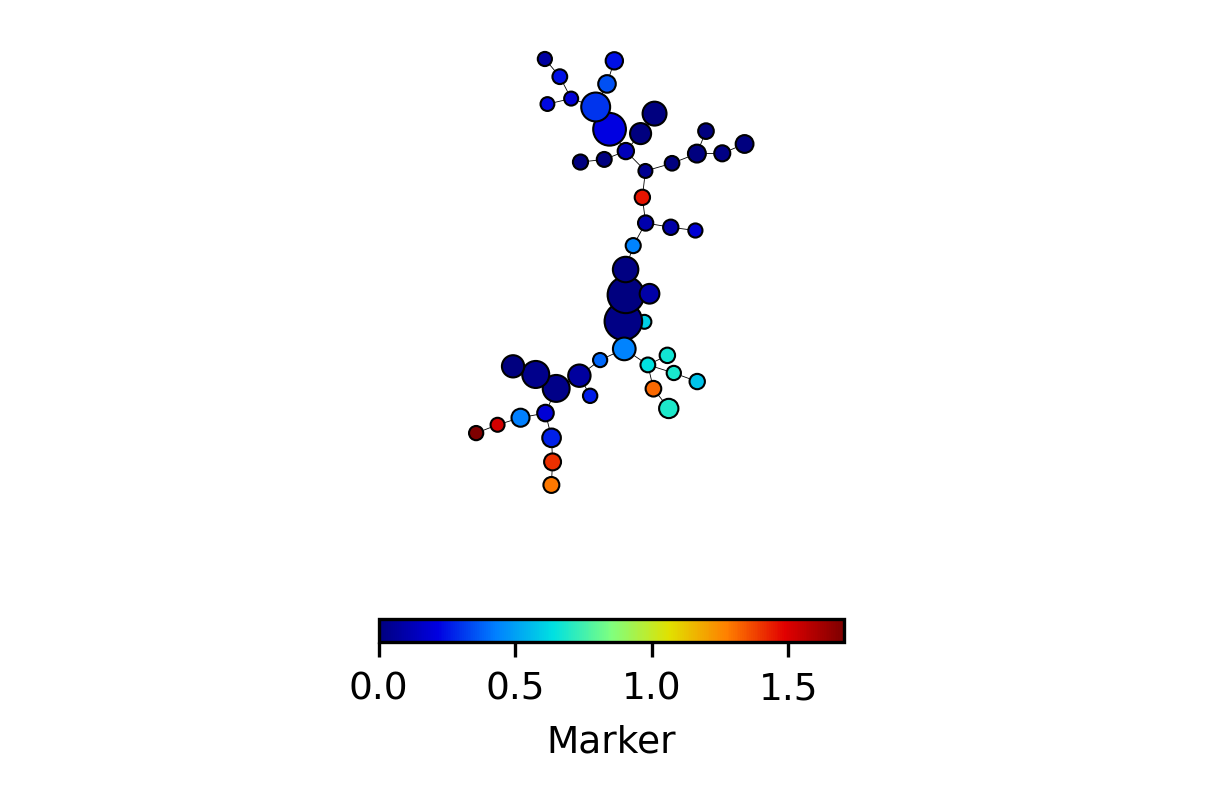

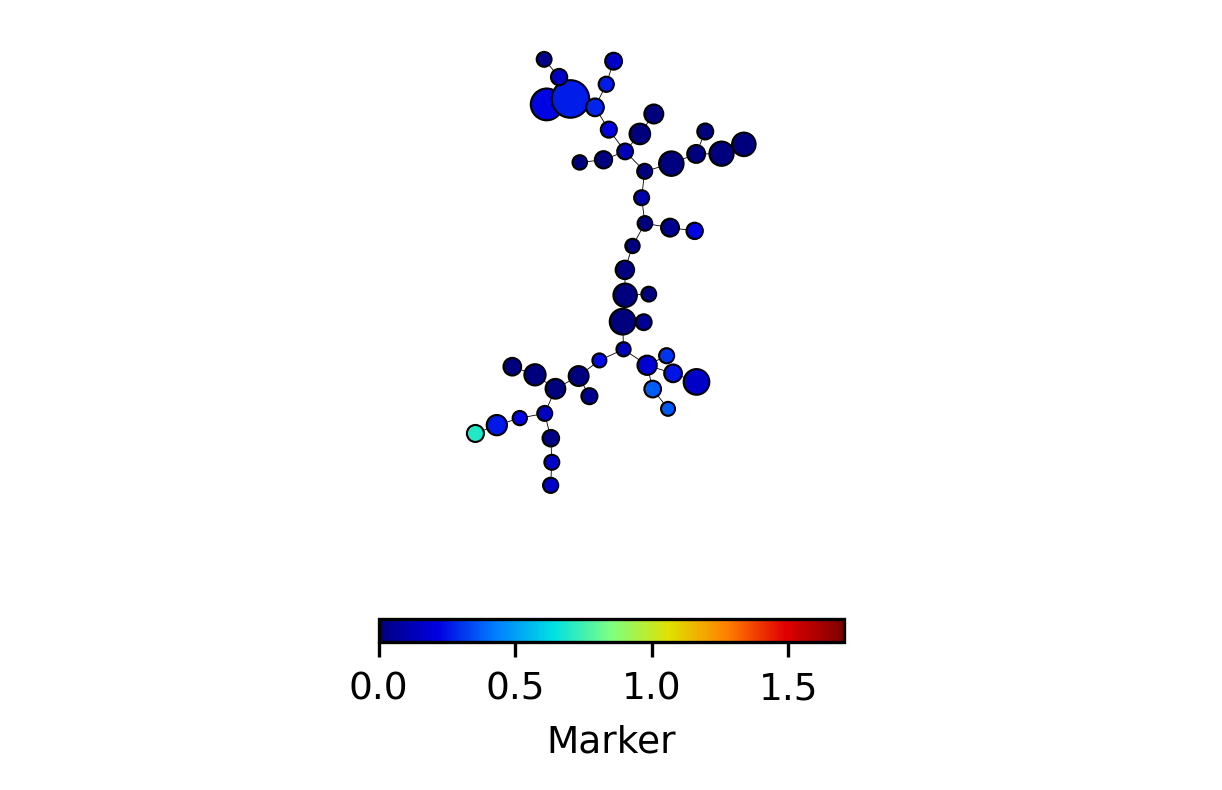

In [33]:
from PlottingFunction import plot_marker_pv_hv
marker='152Sm_PD1'
condition='GMCSF'
fcs_files_hv = [f for f in os.listdir(folder_path) if (f.startswith("PTB_HV") and f.endswith(f"{condition} - MononuclearCells.fcs"))]
ff_list_hv = [fs.io.read_FCS(os.path.join(folder_path, f)) for f in fcs_files_hv]
ff_hv = sc.concat(ff_list_hv, join="inner")

fcs_files_pv = [f for f in os.listdir(folder_path) if (f.startswith("PTB_PV") and f.endswith(f"{condition} - MononuclearCells.fcs"))]
ff_list_pv = [fs.io.read_FCS(os.path.join(folder_path, f)) for f in fcs_files_pv]
ff_pv = sc.concat(ff_list_pv, join="inner") 

ff_pv_norma = pm.tl.normalize_arcsinh(ff_pv, inplace=False)
ff_hv_norma = pm.tl.normalize_arcsinh(ff_hv, inplace=False)

fson_pv=fsom.new_data(ff_pv_norma)
fson_hv=fsom.new_data(ff_hv_norma)

pv,hv = plot_marker_pv_hv(fson_pv,fson_hv, marker=np.array([marker]), lim=None)


In [34]:
for marker in func_markers_list:
    for condition in condition_list:
        #folder_path = "/Users/MacBook/stanford/PTB_drug_screen/PTB drug screen complete - Gated Populations"
        
        fcs_files_hv = [f for f in os.listdir(folder_path) if (f.startswith("PTB_HV") and f.endswith(f"{condition} - MononuclearCells.fcs"))]
        ff_list_hv = [fs.io.read_FCS(os.path.join(folder_path, f)) for f in fcs_files_hv]
        ff_hv = sc.concat(ff_list_hv, join="inner")

        fcs_files_pv = [f for f in os.listdir(folder_path) if (f.startswith("PTB_PV") and f.endswith(f"{condition} - MononuclearCells.fcs"))]
        ff_list_pv = [fs.io.read_FCS(os.path.join(folder_path, f)) for f in fcs_files_pv]
        ff_pv = sc.concat(ff_list_pv, join="inner") 

        ff_pv_norma = pm.tl.normalize_arcsinh(ff_pv, inplace=False)
        ff_hv_norma = pm.tl.normalize_arcsinh(ff_hv, inplace=False)
        
        fson_pv=fsom.new_data(ff_pv_norma)
        fson_hv=fsom.new_data(ff_hv_norma)
        save_dir = f"/Users/MacBook/stanford/PTB_drug_screen/per_marker_and_condition_MONO/{marker}/{condition}"
        os.makedirs(save_dir, exist_ok=True)
        
        pv, hv = plot_marker_pv_hv(fson_pv, fson_hv, marker=[marker])  

        pv.suptitle(f"{marker} expression for PV and "+condition)
        hv.suptitle(f"{marker} expression for HV and "+condition)

        pv.savefig(os.path.join(save_dir, f"{marker}_{condition}_PV.pdf"), format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.05)
        plt.close(pv.figure)

        hv.savefig(os.path.join(save_dir, f"{marker}_{condition}_HV.pdf"), format="pdf", dpi=300, bbox_inches="tight", pad_inches=0.05)
        plt.close(hv.figure)


/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/MacBook/miniconda3/envs/venv_why_